## Credit Card Fraud Detection

Context:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Dataset - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

Reference Video - https://www.youtube.com/watch?v=frM_7UMD_-A

Class variable is a flag for indicating whether the transaction is a fraud or not.
Feature 'Class' is the response variable and it takes value 1 in case of a fraud and 0 otherwise.

The data is highly imbalanced with only 0.172% of all transactions being fraudulant.

In [1]:
##Importing Necessary Libraries
import os
cwd = os.getcwd()
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
seed = 69
Labels = ['Normal','Fraud']

In [2]:
data = pd.read_csv("..//Data/creditcard.csv", sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploratory Data Analysis

In [4]:
#Checking for any null values
data.isnull().values.any()

False

Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\ashwe\AppData\Local\Temp\ipykernel_27132\3872320674.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

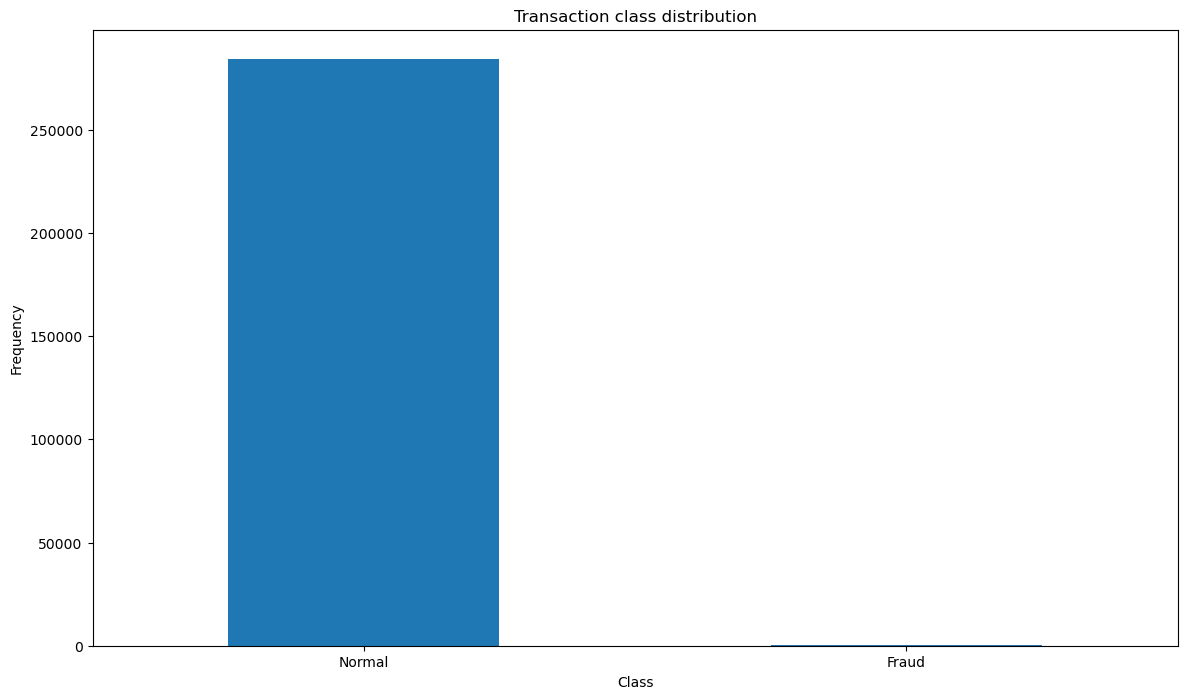

In [5]:
count_classes = pd.value_counts(data['Class'], sort = True)
print(count_classes)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), Labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
#Seperating the dataset into fraud and normal to analyze these classes individually

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [7]:
#Comparing fraudulant class against amount

fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

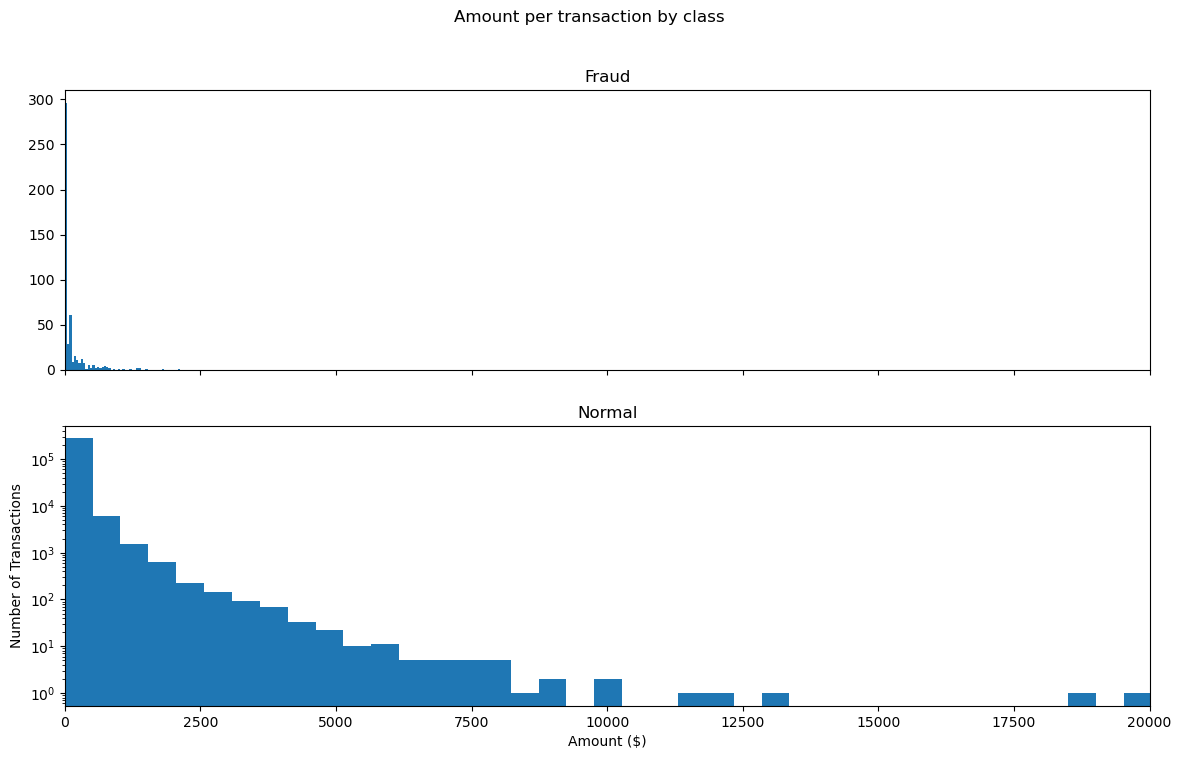

In [9]:
#Visualizing the two classes against amount

f,(ax1, ax2) = plt.subplots(2,1,sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

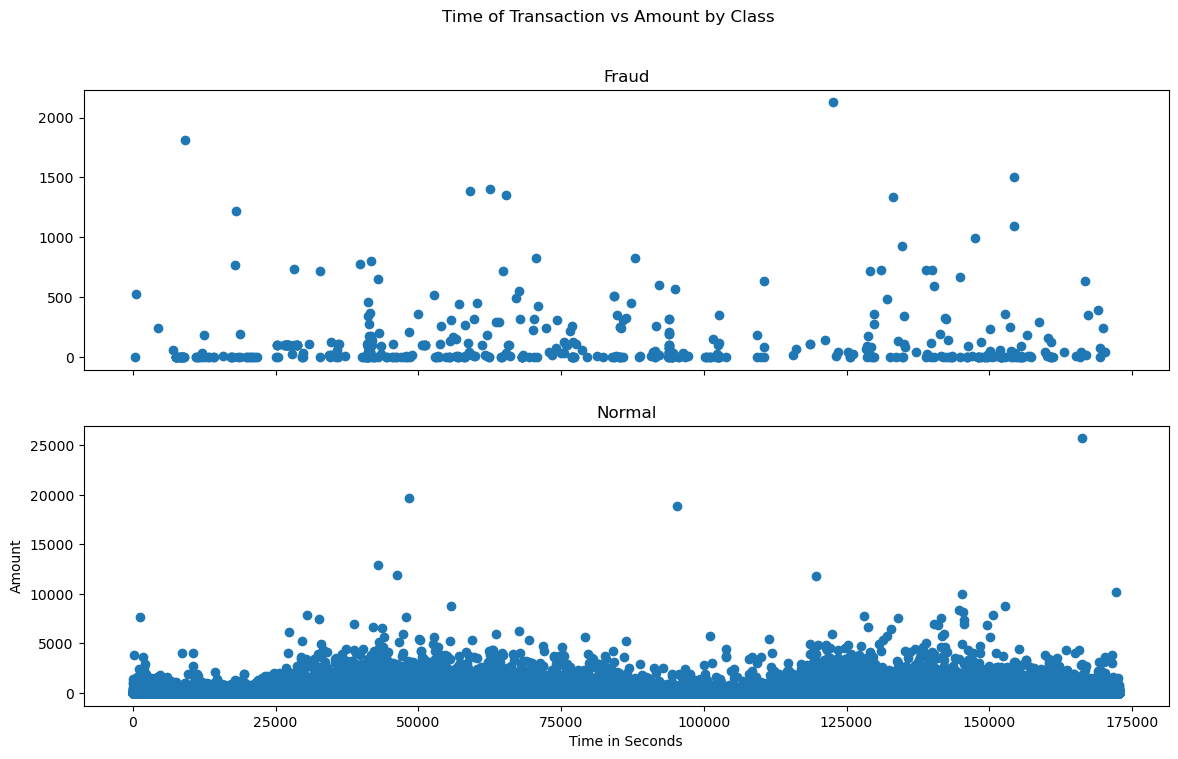

In [10]:
#Checking if fraud happens in a certain time frame


f, (ax1,ax2) = plt.subplots(2,1, sharex = True)
f.suptitle('Time of Transaction vs Amount by Class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title("Fraud")
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title("Normal")
plt.xlabel("Time in Seconds")
plt.ylabel("Amount")
plt.show()


In [11]:
#Taking a random sample of data

data_sample = data.sample(frac = 0.1, random_state = 1)

print(data_sample.shape)
print(data.shape)

(28481, 31)
(284807, 31)


In [12]:
#Finding out the distribution of fradulant and non-fraudulant data in the sample

sample_fraud = data_sample[data_sample['Class'] == 1]
sample_normal = data_sample[data_sample['Class'] == 0]

print("Sample Fraud: ", len(sample_fraud))
print("Sample Normal:", len(sample_normal))

outlier_fraction = float(len(sample_fraud))/float(len(sample_normal))
print("Outlier Fraction: ",outlier_fraction)

Sample Fraud:  49
Sample Normal: 28432
Outlier Fraction:  0.0017234102419808666
